In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from my_functions import stats, plot_hue

In [2]:
data = pd.read_csv('german.data', header = None, sep = " ")
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
data.columns = names

In [3]:
print(data.head(5))
print(data.shape)

  existingchecking  duration credithistory purpose  creditamount savings  \
0              A11         6           A34     A43          1169     A65   
1              A12        48           A32     A43          5951     A61   
2              A14        12           A34     A46          2096     A61   
3              A11        42           A32     A42          7882     A61   
4              A11        24           A33     A40          4870     A61   

  employmentsince  installmentrate statussex otherdebtors  ...  property age  \
0             A75                4       A93         A101  ...      A121  67   
1             A73                2       A92         A101  ...      A121  22   
2             A74                2       A93         A101  ...      A121  49   
3             A74                2       A93         A103  ...      A122  45   
4             A73                3       A93         A101  ...      A124  53   

   otherinstallmentplans housing existingcredits   job peoplel

In [4]:
data['classification'].replace([1,2], [1,0], inplace=True)

In [5]:
data.isnull().sum()

existingchecking         0
duration                 0
credithistory            0
purpose                  0
creditamount             0
savings                  0
employmentsince          0
installmentrate          0
statussex                0
otherdebtors             0
residencesince           0
property                 0
age                      0
otherinstallmentplans    0
housing                  0
existingcredits          0
job                      0
peopleliable             0
telephone                0
foreignworker            0
classification           0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   employmentsince        1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   statussex              1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  residencesince         1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

In [7]:
data.describe()
## mean and median differ
## large difference between 75% and max value - duration, creditamount, age 
## Indicates extreme values

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


['duration', 'creditamount', 'installmentrate', 'residencesince', 'age', 'existingcredits', 'peopleliable', 'classification']


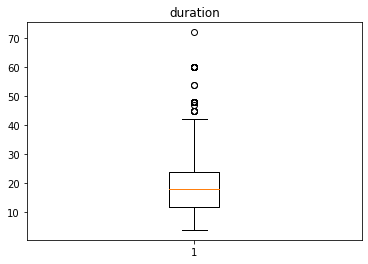

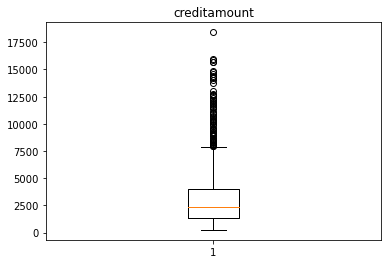

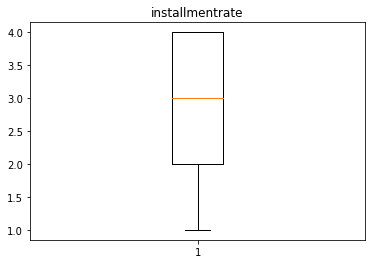

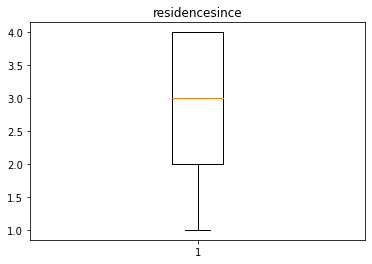

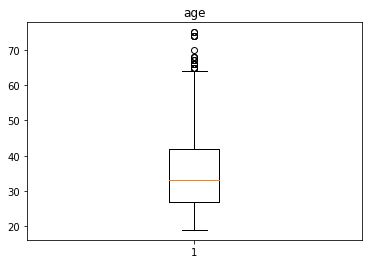

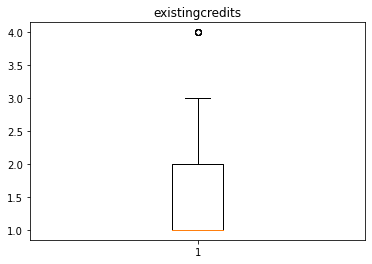

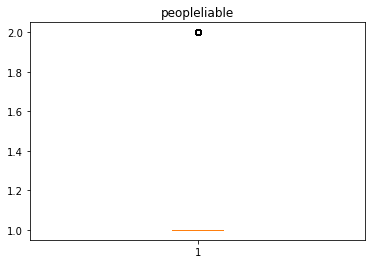

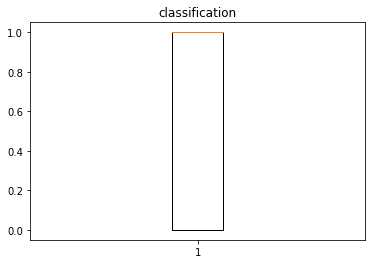

In [8]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print(num_cols)
# boxplot = data.boxplot(column=num_cols)
for num in num_cols:
    plt.boxplot(data[num])
    plt.title(num)
    plt.show()
## duration, creditamount, age, existingcredits, peopleliable have outliers

In [9]:
print(data['peopleliable'].value_counts())
print(data['existingcredits'].value_counts())
print(data['classification'].value_counts())
print(data['residencesince'].value_counts())
print(data['installmentrate'].value_counts())

1    845
2    155
Name: peopleliable, dtype: int64
1    633
2    333
3     28
4      6
Name: existingcredits, dtype: int64
1    700
0    300
Name: classification, dtype: int64
4    413
2    308
3    149
1    130
Name: residencesince, dtype: int64
4    476
2    231
3    157
1    136
Name: installmentrate, dtype: int64


In [10]:
cat_cols = data.select_dtypes(exclude=np.number).columns.tolist()
stats(num_cols,data)
## the statistics of duration and credit amount vary depending on the classfication value

duration
                count       mean        std  min   25%   50%   75%   max
classification                                                          
0               300.0  24.860000  13.282639  6.0  12.0  24.0  36.0  72.0
1               700.0  19.207143  11.079564  4.0  12.0  18.0  24.0  60.0


creditamount
                count         mean          std    min     25%     50%  \
classification                                                           
0               300.0  3938.126667  3535.818955  433.0  1352.5  2574.5   
1               700.0  2985.457143  2401.472278  250.0  1375.5  2244.0   

                    75%      max  
classification                    
0               5141.50  18424.0  
1               3634.75  15857.0  


installmentrate
                count      mean       std  min  25%  50%  75%  max
classification                                                    
0               300.0  3.096667  1.088395  1.0  2.0  4.0  4.0  4.0
1               700.0  2.920

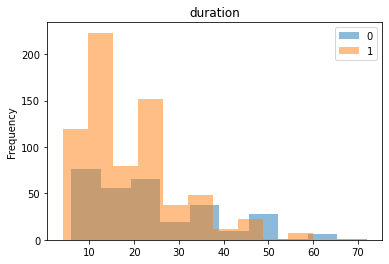

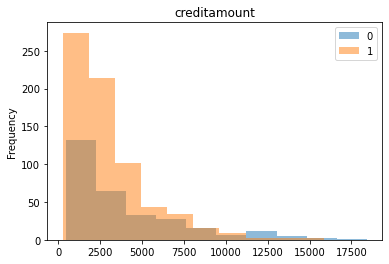

In [12]:
li = ['duration', 'creditamount']
hue = 'classification'
plot_hue(li,hue, data)

In [16]:
data0 = data[data['classification'] == 0]
data1 = data[data['classification'] == 1].sample(300)
print(data0.shape)
print(data1.shape)
data_sam = pd.concat([data0, data1], ignore_index = True)
print(data_sam.shape)
stats(num_cols, data_sam)

(300, 21)
(300, 21)
(600, 21)
duration
                count   mean        std  min   25%   50%   75%   max
classification                                                      
0               300.0  24.86  13.282639  6.0  12.0  24.0  36.0  72.0
1               300.0  18.77  10.826873  4.0  12.0  15.0  24.0  60.0


creditamount
                count         mean          std    min     25%     50%  \
classification                                                           
0               300.0  3938.126667  3535.818955  433.0  1352.5  2574.5   
1               300.0  2858.760000  2356.024116  250.0  1310.0  2137.5   

                    75%      max  
classification                    
0               5141.50  18424.0  
1               3542.75  15857.0  


installmentrate
                count      mean       std  min  25%  50%  75%  max
classification                                                    
0               300.0  3.096667  1.088395  1.0  2.0  4.0  4.0  4.0
1             

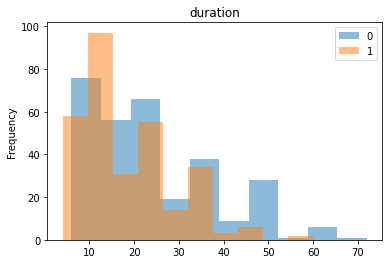

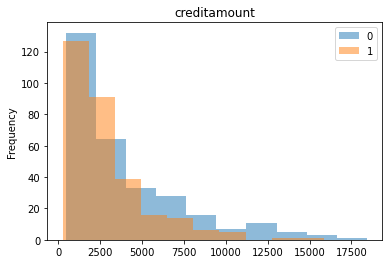

In [17]:
plot_hue(li,hue,data_sam)
### good debts may have low credit amount and less duration

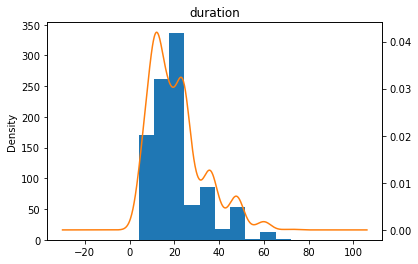

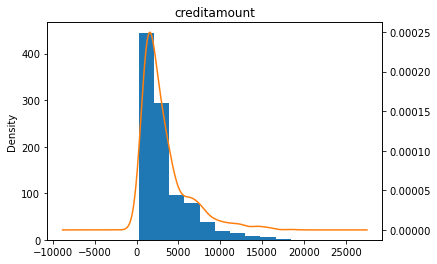

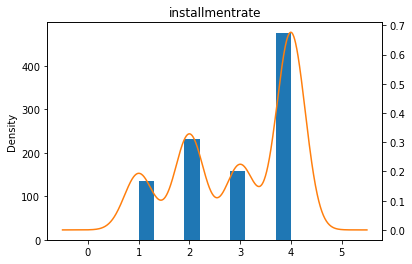

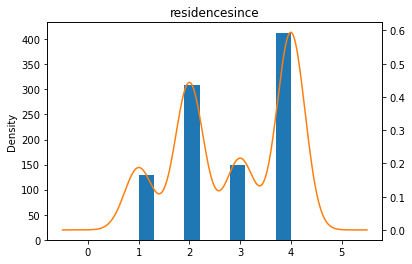

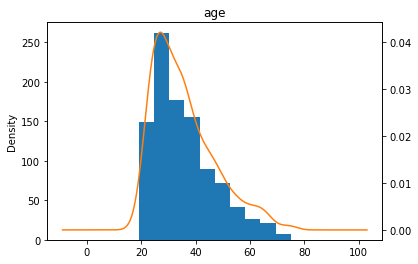

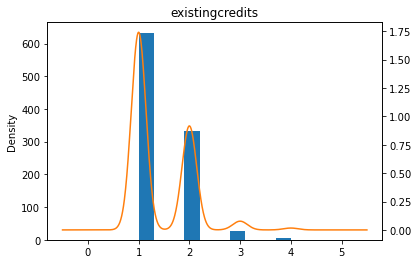

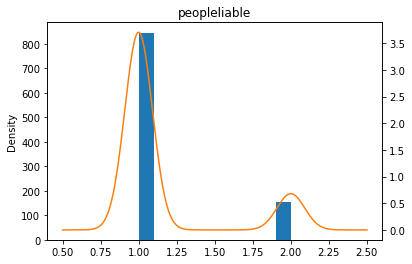

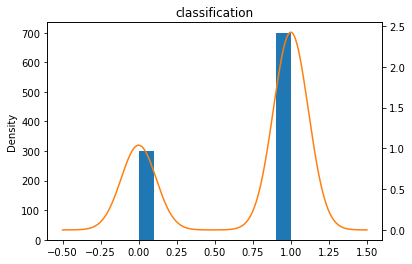

In [18]:
for num in num_cols:
    ax = data[num].plot(kind = 'hist')
    data[num].plot(kind='kde', ax=ax, secondary_y=True)
    plt.title(num)
    plt.show()
### data is skewed

[Text(0.5, 0, 'duration'),
 Text(1.5, 0, 'creditamount'),
 Text(2.5, 0, 'installmentrate'),
 Text(3.5, 0, 'residencesince'),
 Text(4.5, 0, 'age'),
 Text(5.5, 0, 'existingcredits'),
 Text(6.5, 0, 'peopleliable'),
 Text(7.5, 0, 'classification')]

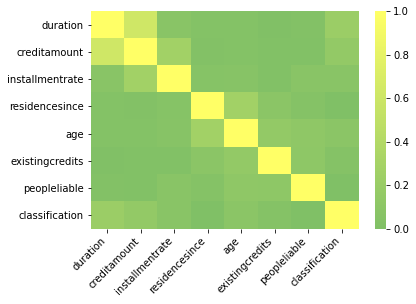

In [19]:
## correlation analysis
corr = data.corr()
ax = sns.heatmap(abs(corr), vmin=0, vmax =1, center = 0, cmap = 'summer')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
# print(corr)
## duration and creditamount are correlated

/home/aru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/aru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


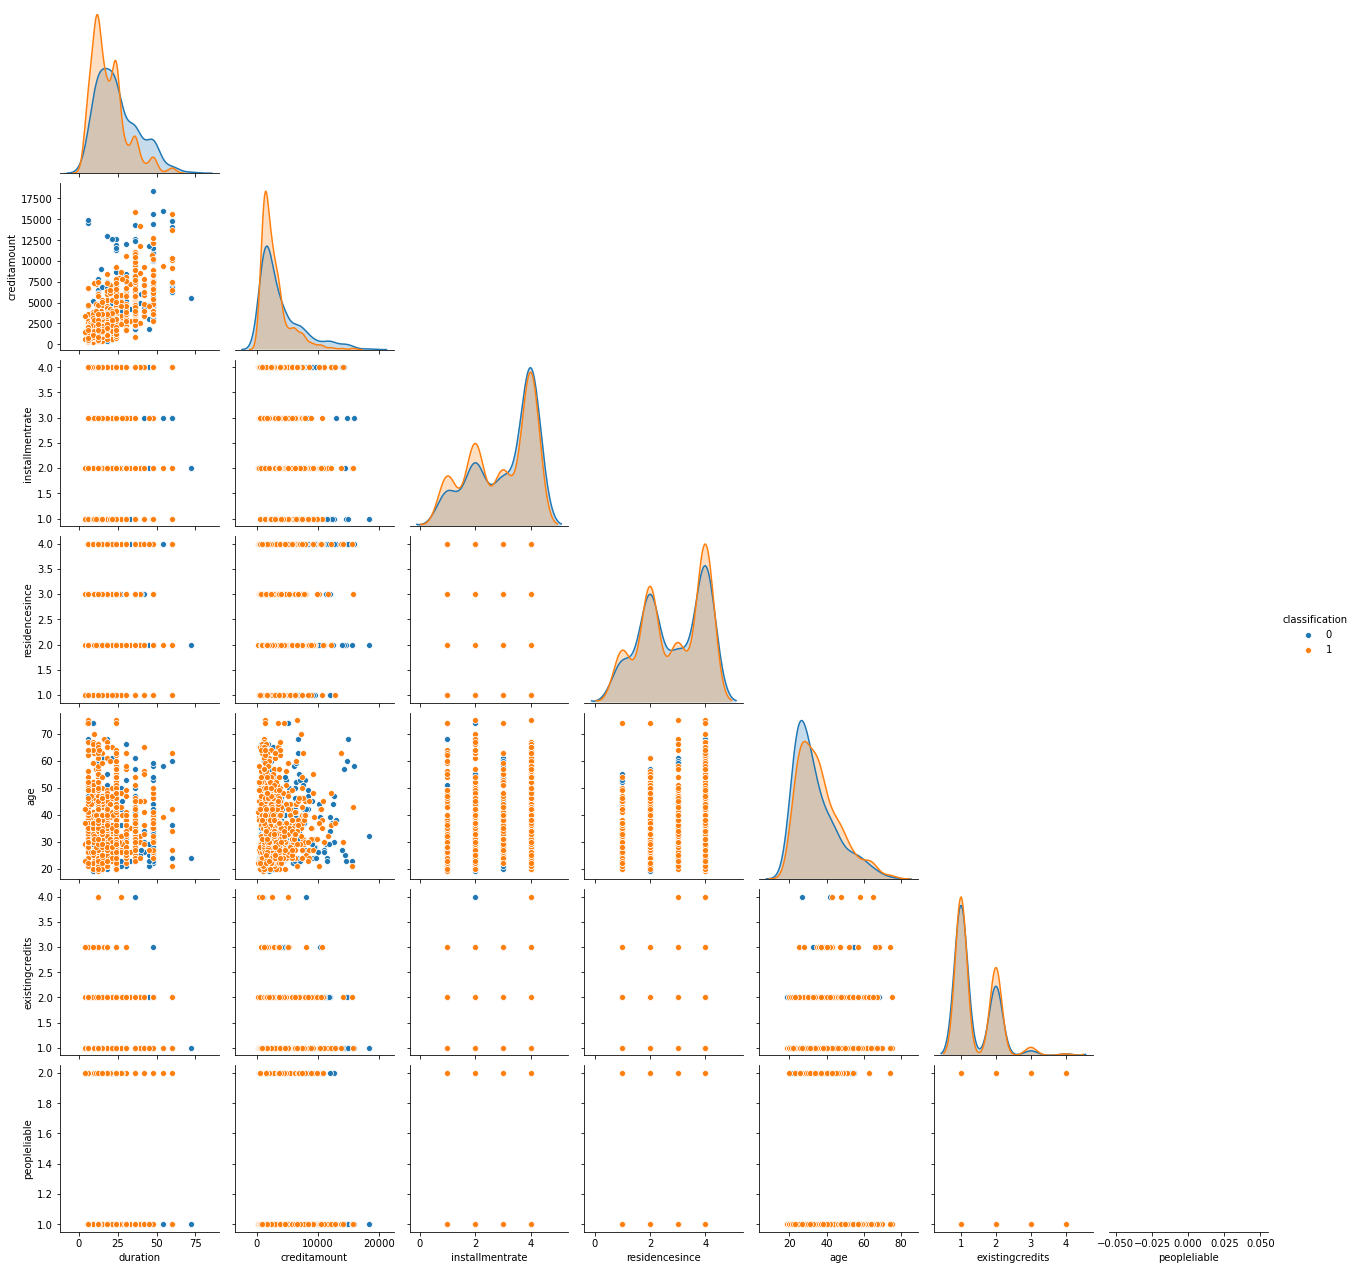

In [20]:
data['classification'].replace([1,2], [1,0], inplace=True)
sns.pairplot(data,corner = True, hue = 'classification')
## numerical columns are not clustered with repsect to the class

/home/aru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/aru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/aru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/aru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/aru/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/aru/anaconda3/lib/python3.8/site-packages/seaborn/distribut

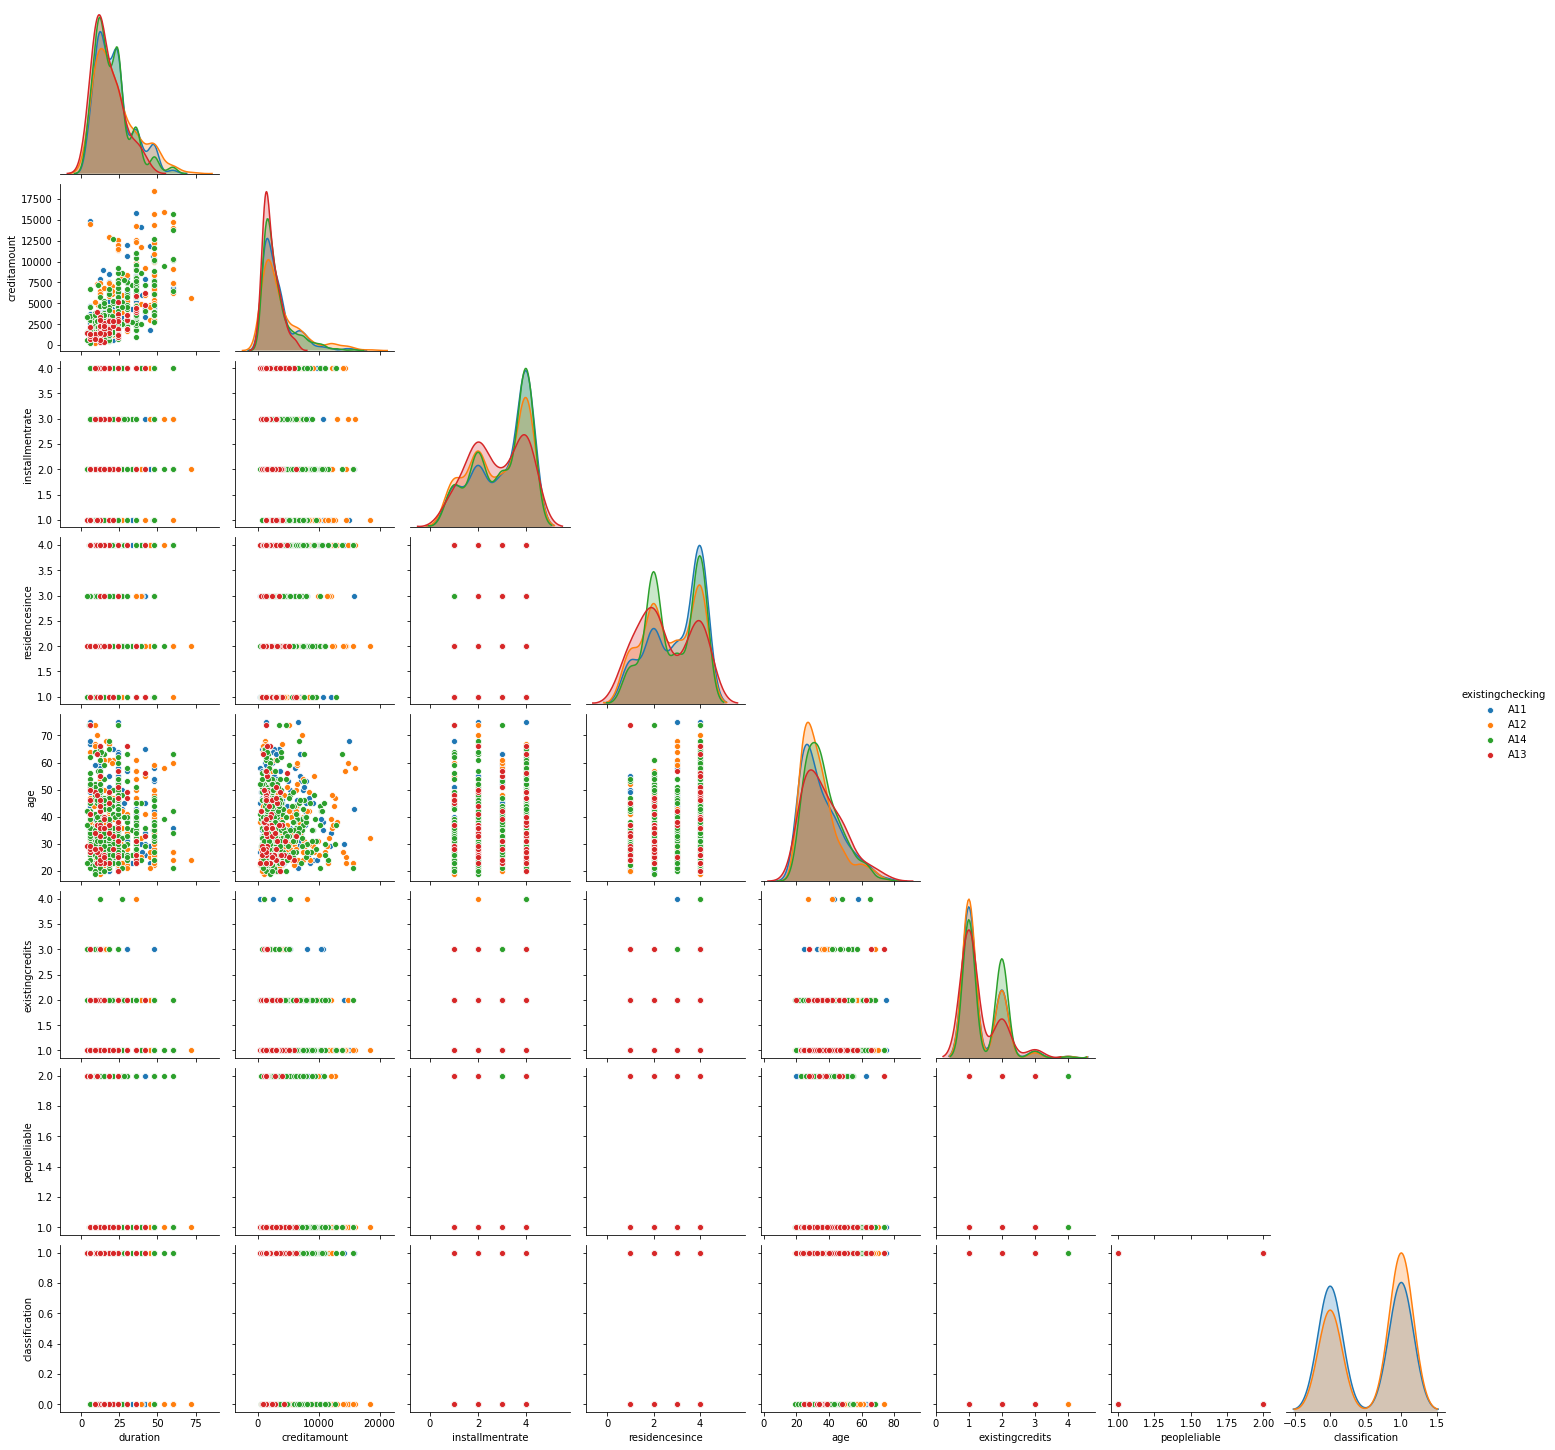

In [22]:
sns.pairplot(data,corner = True, hue = 'existingchecking')

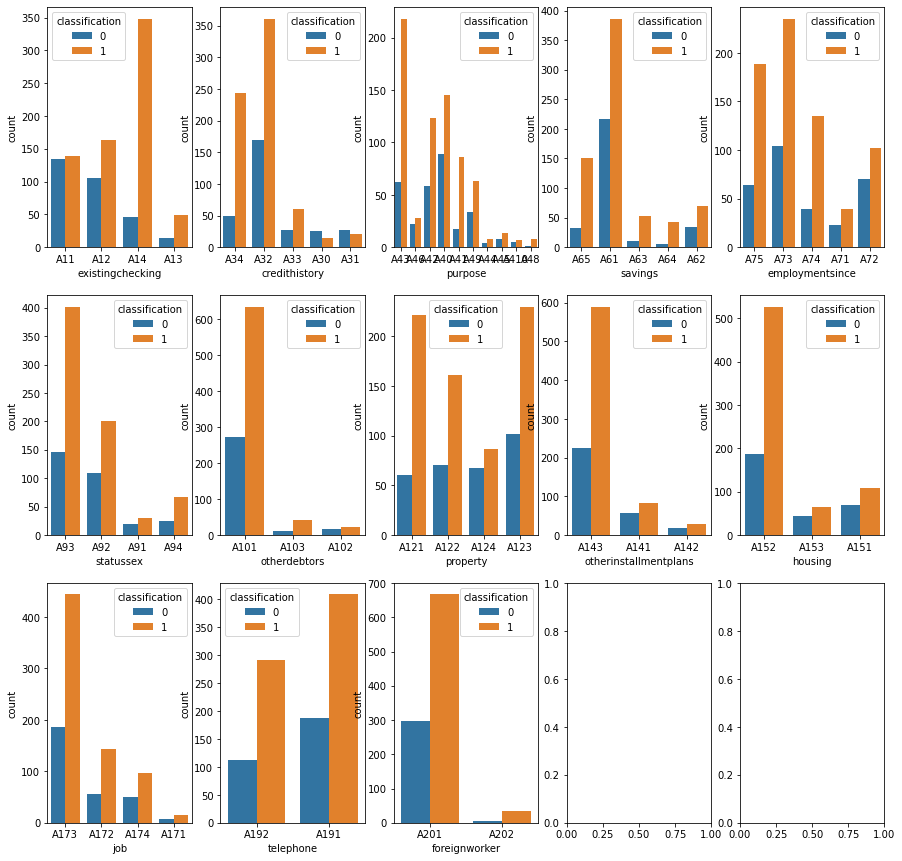

In [23]:
# print(cat_cols)
fig, ax =plt.subplots(3,5, figsize=(15,15))
x = 0
y = 0
for col in cat_cols:
    if y>4:
        x = x+1
        y = 0
    sns.countplot(x = col, data = data, hue = 'classification', ax = ax[x,y])
    y = y+1

In [24]:
## one hot encoding
dummyvars = pd.get_dummies(data[cat_cols])
# print(dummyvars)
data = pd.concat([data[num_cols], dummyvars],axis = 1)
print(data.shape)

(1000, 62)


In [25]:
data.head()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
